In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
training_start = 1
training_end = 3

test_start =4
test_end =7

In [3]:
# Define the mapping of attack types to integer keys
attack_type_map = {
    'Benign': 0,
    'DoS': 1,
    'scanning': 2,
    'DDoS': 3,
    'xss': 4,
    'Bot': 5,
    'Reconnaissance': 6,
    'password': 7,
    'Fuzzers': 8,
    'injection': 9,
    'Theft': 10,
    'Brute Force': 11,
    'Infilteration': 12,
    'Exploits': 13,
    'Generic': 14,
    'Analysis': 15,
    'Backdoor': 16,
    'mitm': 17,
    'Shellcode': 18,
    'ransomware': 19,
    'Worms': 20
}

drop_column={
    'Dataset',
    'IPV4_SRC_ADDR',
    'IPV4_DST_ADDR',
    'L7_PROTO',
    'SRC_TO_DST_SECOND_BYTES',
    'DST_TO_SRC_SECOND_BYTES',
    'FTP_COMMAND_RET_CODE',

}


In [4]:
train_url =[f'dataset-v2/part_{i}.csv' for i in range(training_start,training_end)]
test_url =[f'dataset-v2/part_{i}.csv' for i in range(test_start,test_end)]

In [5]:

data = pd.read_csv(train_url[0])
test = pd.read_csv(test_url[0])

In [6]:
num_type = Counter(data['Attack'])

print("Số lượng của mỗi phần tử:", num_type)


Số lượng của mỗi phần tử: Counter({'Benign': 281373, 'DDoS': 243054, 'DoS': 200264, 'scanning': 42872, 'Reconnaissance': 29229, 'xss': 27486, 'password': 12762, 'injection': 7650, 'Bot': 1579, 'Brute Force': 1375, 'Infilteration': 1322, 'Exploits': 355, 'Fuzzers': 245, 'Backdoor': 208, 'Generic': 177, 'mitm': 83, 'ransomware': 40, 'Analysis': 33, 'Theft': 19, 'Shellcode': 15, 'Worms': 4})


In [40]:
unique_attacks = data['Attack'].unique()
print(unique_attacks)

['DoS' 'Benign' 'scanning' 'DDoS' 'xss' 'Bot' 'Reconnaissance' 'password'
 'Fuzzers' 'injection' 'Theft' 'Brute Force' 'Infilteration' 'Exploits'
 'Generic' 'Analysis' 'Backdoor' 'mitm' 'Shellcode' 'ransomware' 'Worms']


In [41]:
data.drop(columns=drop_column, inplace=True)
test.drop(columns=drop_column, inplace=True)
data.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,Label,Attack
0,65389,80,6,420,3,0,0,2,2,0,...,0,512,0,35840,140,0,0,0,1,DoS
1,11154,80,6,280,2,40,1,22,2,20,...,0,512,0,0,0,0,0,0,1,DoS
2,42062,1041,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,Benign
3,46849,9110,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,Benign
4,50360,1084,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,Benign


In [42]:
data.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,Label,Attack
0,65389,80,6,420,3,0,0,2,2,0,...,0,512,0,35840,140,0,0,0,1,DoS
1,11154,80,6,280,2,40,1,22,2,20,...,0,512,0,0,0,0,0,0,1,DoS
2,42062,1041,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,Benign
3,46849,9110,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,Benign
4,50360,1084,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,Benign


In [43]:
data['Attack'] = data['Attack'].map(attack_type_map)
test['Attack'] = test['Attack'].map(attack_type_map)
#

In [44]:
data.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,Label,Attack
0,65389,80,6,420,3,0,0,2,2,0,...,0,512,0,35840,140,0,0,0,1,1
1,11154,80,6,280,2,40,1,22,2,20,...,0,512,0,0,0,0,0,0,1,1
2,42062,1041,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,0
3,46849,9110,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,0
4,50360,1084,6,44,1,40,1,22,2,20,...,0,1024,0,0,0,0,0,0,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850145 entries, 0 to 850144
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   L4_SRC_PORT                  850145 non-null  int64
 1   L4_DST_PORT                  850145 non-null  int64
 2   PROTOCOL                     850145 non-null  int64
 3   IN_BYTES                     850145 non-null  int64
 4   IN_PKTS                      850145 non-null  int64
 5   OUT_BYTES                    850145 non-null  int64
 6   OUT_PKTS                     850145 non-null  int64
 7   TCP_FLAGS                    850145 non-null  int64
 8   CLIENT_TCP_FLAGS             850145 non-null  int64
 9   SERVER_TCP_FLAGS             850145 non-null  int64
 10  FLOW_DURATION_MILLISECONDS   850145 non-null  int64
 11  DURATION_IN                  850145 non-null  int64
 12  DURATION_OUT                 850145 non-null  int64
 13  MIN_TTL                      

In [46]:
data['Label'].unique()

array([1, 0], dtype=int64)

In [47]:
drop_purposed_column= {
    'Label',
    'Attack'
}
label = data['Label']
attack = data['Attack']

In [48]:
data.drop(columns=drop_purposed_column, inplace=True)


In [49]:
data.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'IN_BYTES', 'IN_PKTS',
       'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER'],
      dtype='object')

In [50]:
label.describe()

count    850145.000000
mean          0.669029
std           0.470563
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Label, dtype: float64

In [51]:
# label.replace(1,-1, inplace=True)
label.replace(0,-1, inplace=True)


In [52]:
label.describe()

count    850145.000000
mean          0.338059
std           0.941126
min          -1.000000
25%          -1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Label, dtype: float64

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850145 entries, 0 to 850144
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   L4_SRC_PORT                  850145 non-null  int64
 1   L4_DST_PORT                  850145 non-null  int64
 2   PROTOCOL                     850145 non-null  int64
 3   IN_BYTES                     850145 non-null  int64
 4   IN_PKTS                      850145 non-null  int64
 5   OUT_BYTES                    850145 non-null  int64
 6   OUT_PKTS                     850145 non-null  int64
 7   TCP_FLAGS                    850145 non-null  int64
 8   CLIENT_TCP_FLAGS             850145 non-null  int64
 9   SERVER_TCP_FLAGS             850145 non-null  int64
 10  FLOW_DURATION_MILLISECONDS   850145 non-null  int64
 11  DURATION_IN                  850145 non-null  int64
 12  DURATION_OUT                 850145 non-null  int64
 13  MIN_TTL                      

In [54]:
IsolationForest_model= IsolationForest()

In [55]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

print('Demo IF prediction')
IsolationForest_model.fit(data)


Demo IF prediction


IsolationForest()

In [56]:
IsolationForest_model.decision_function(data)

array([ 0.02994804,  0.1022707 ,  0.13901299, ...,  0.10039039,
        0.05918965, -0.00346168])

In [57]:
y_pred = IsolationForest_model.predict(data)

In [58]:
y_pred

array([ 1,  1,  1, ...,  1,  1, -1])

In [59]:
data['scores'] = IsolationForest_model.decision_function(data)

In [60]:
data

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,NUM_PKTS_512_TO_1024_BYTES,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,scores
0,65389,80,6,420,3,0,0,2,2,0,...,0,0,512,0,35840,140,0,0,0,0.029948
1,11154,80,6,280,2,40,1,22,2,20,...,0,0,512,0,0,0,0,0,0,0.102271
2,42062,1041,6,44,1,40,1,22,2,20,...,0,0,1024,0,0,0,0,0,0,0.139013
3,46849,9110,6,44,1,40,1,22,2,20,...,0,0,1024,0,0,0,0,0,0,0.135394
4,50360,1084,6,44,1,40,1,22,2,20,...,0,0,1024,0,0,0,0,0,0,0.140504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850140,40400,80,6,280,2,0,0,2,2,0,...,0,0,512,0,0,0,0,0,0,0.117144
850141,57979,80,6,280,2,0,0,2,2,0,...,0,0,512,0,0,0,0,0,0,0.113749
850142,5520,80,17,140,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.100390
850143,55682,80,6,360,4,88,2,22,6,18,...,0,0,512,29200,0,0,0,0,0,0.059190


In [61]:
print("IF acc = {}".format(accuracy_score(label, y_pred)))
print("-IF f1 = {}".format(f1_score(label, y_pred)))
print("-IF roc auc = {}".format(roc_auc_score(label,y_pred)))
print(confusion_matrix(label, y_pred))

IF acc = 0.7078192543624912
-IF f1 = 0.8132644515644992
-IF roc auc = 0.5836241085921027
[[ 60846 220527]
 [ 27869 540903]]


In [62]:
# Show the number of elements in y_pred
num_elements = y_pred.shape[0]
print(num_elements)

850145


In [63]:
element_counts = Counter(y_pred)

print("Số lượng của mỗi phần tử:", element_counts)


Số lượng của mỗi phần tử: Counter({1: 761430, -1: 88715})


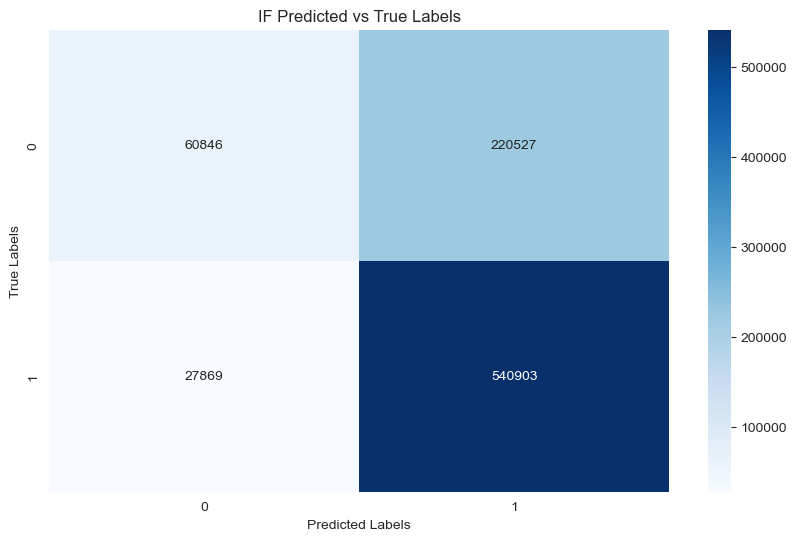

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(label, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('IF Predicted vs True Labels')
plt.show()

In [65]:
data['Label']=label
data['prediction']=y_pred

In [66]:
data.head()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,SERVER_TCP_FLAGS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,scores,Label,prediction
0,65389,80,6,420,3,0,0,2,2,0,...,512,0,35840,140,0,0,0,0.029948,1,1
1,11154,80,6,280,2,40,1,22,2,20,...,512,0,0,0,0,0,0,0.102271,1,1
2,42062,1041,6,44,1,40,1,22,2,20,...,1024,0,0,0,0,0,0,0.139013,-1,1
3,46849,9110,6,44,1,40,1,22,2,20,...,1024,0,0,0,0,0,0,0.135394,-1,1
4,50360,1084,6,44,1,40,1,22,2,20,...,1024,0,0,0,0,0,0,0.140504,-1,1
